# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import Dataset

In [2]:
store_data = pd.read_csv(r'C:\Users\roaia\Downloads\data\store_data.csv')
master_product = pd.read_csv(r'C:\Users\roaia\Downloads\data\master_product.csv')
master_customer = pd.read_csv(r'C:\Users\roaia\Downloads\data\master_customer.csv')

In [3]:
store_data.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount
0,1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02
1,2,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG/12520,FUR-CH-10000454,10979100.0,0.01


In [4]:
master_product.head(2)

,Product_ID,Category,Sub_Category,Product_Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."


In [5]:
master_customer.head(2)

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Age
0,CG/12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
1,DV/13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,47


# Prepare and Clean

In [6]:
# merge store_data df & master_product df on 'Product_ID' column and save result in new df store_data.
store_data = pd.merge(left=store_data, right=master_product, how='inner', on='Product_ID')
store_data.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount,Category,Sub_Category,Product_Name
0,1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,5400,CA-2017-117681,4/9/2017,4/14/2017,Standard Class,HF/14995,FUR-BO-10001798,8349975.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase


In [7]:
# merge store_data df & master_customer df on 'Customer_ID' column and save result in new df store_data.
store_data = pd.merge(left=store_data, right=master_customer, how='inner', on='Customer_ID')
store_data.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount,Category,Sub_Category,Product_Name,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Age
0,1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
1,2,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG/12520,FUR-CH-10000454,10979100.0,0.01,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42


In [8]:
# drop 'Row_ID' column
store_data.drop(columns='Row_ID', axis=1, inplace=True)
store_data.head(2)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount,Category,Sub_Category,Product_Name,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Age
0,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG/12520,FUR-CH-10000454,10979100.0,0.01,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42


In [9]:
# check data type
store_data.dtypes

Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_ID       object
Product_ID        object
Sales            float64
Discount         float64
Category          object
Sub_Category      object
Product_Name      object
Customer_Name     object
Segment           object
Country           object
City              object
State             object
Postal_Code        int64
Region            object
Age                int64
dtype: object

In [11]:
# convert 'Order_Date' to datetime.
store_data['Order_Date'] = pd.to_datetime(store_data['Order_Date'])
store_data['Order_Date']

0      2017-11-08
1      2017-11-08
2      2018-01-26
3      2016-10-15
4      2016-10-15
          ...    
9795   2017-01-22
9796   2017-01-22
9797   2016-09-24
9798   2017-08-16
9799   2017-12-30
Name: Order_Date, Length: 9800, dtype: datetime64[ns]

In [13]:
# convert 'Ship_Date' to datetime.
store_data['Ship_Date'] = pd.to_datetime(store_data['Ship_Date'])
store_data['Ship_Date']

0      2017-11-11
1      2017-11-11
2      2018-01-27
3      2016-10-15
4      2016-10-15
          ...    
9795   2017-01-28
9796   2017-01-28
9797   2016-09-26
9798   2017-08-19
9799   2018-01-02
Name: Ship_Date, Length: 9800, dtype: datetime64[ns]

In [14]:
# check null values.
store_data.isnull().sum()

Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Product_ID        0
Sales            30
Discount          0
Category          0
Sub_Category      0
Product_Name      0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code       0
Region            0
Age               0
dtype: int64

In [15]:
# check duplicated values.
store_data.duplicated().sum()

0

In [21]:
# drop null values in 'Sales' column.
store_data = store_data[store_data['Sales'].isnull()==False]

In [22]:
# final check.
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9770 non-null   object        
 1   Order_Date     9770 non-null   datetime64[ns]
 2   Ship_Date      9770 non-null   datetime64[ns]
 3   Ship_Mode      9770 non-null   object        
 4   Customer_ID    9770 non-null   object        
 5   Product_ID     9770 non-null   object        
 6   Sales          9770 non-null   float64       
 7   Discount       9770 non-null   float64       
 8   Category       9770 non-null   object        
 9   Sub_Category   9770 non-null   object        
 10  Product_Name   9770 non-null   object        
 11  Customer_Name  9770 non-null   object        
 12  Segment        9770 non-null   object        
 13  Country        9770 non-null   object        
 14  City           9770 non-null   object        
 15  State          9770 n

# Analysis

In [37]:
store_data.head(2)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount,Category,Sub_Category,Product_Name,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Age
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-CH-10000454,10979100.0,0.01,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42


In [23]:
# visuilization correlation between numerical data.
px.imshow(store_data.corr(numeric_only=True), aspect=True, text_auto=True, color_continuous_scale='Blues')

In [33]:
# describe about categorical columns.
store_data.describe(include='object',datetime_is_numeric=True).round(2)

,Order_ID,Ship_Mode,Customer_ID,Product_ID,Category,Sub_Category,Product_Name,Customer_Name,Segment,Country,City,State,Region
count,9770,9770,9770,9770,9770,9770,9770,9770,9770,9770,9770,9770,9770
unique,4912,4,793,1861,3,17,1817,793,3,1,252,41,4
top,CA-2018-100111,Standard Class,WB/21850,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,William Brown,Consumer,United States,New York City,California,West
freq,14,5841,35,19,5880,1468,47,35,5084,9770,831,1931,3147


In [34]:
# describe about numerical columns.
store_data.describe(exclude='object',datetime_is_numeric=True).round(2)

,Order_Date,Ship_Date,Sales,Discount,Postal_Code,Age
count,9770,9770,9.770000e+03,9770.00,9770.00,9770.00
mean,2017-05-01 11:43:03.009211904,2017-05-05 10:47:37.891504640,3.472114e+06,0.02,55241.08,34.00
min,2015-01-03 00:00:00,2015-01-07 00:00:00,2.112000e+04,0.01,1841.00,19.00
25%,2016-05-25 00:00:00,2016-05-28 00:00:00,2.619000e+05,0.01,27360.00,26.00
50%,2017-06-26 00:00:00,2017-06-30 00:00:00,8.236500e+05,0.02,55901.00,34.00
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,3.167520e+06,0.03,89115.00,42.00
max,2018-12-30 00:00:00,2019-01-05 00:00:00,3.395772e+08,0.03,99207.00,48.00
std,NaN,NaN,9.412259e+06,0.01,31460.73,8.71


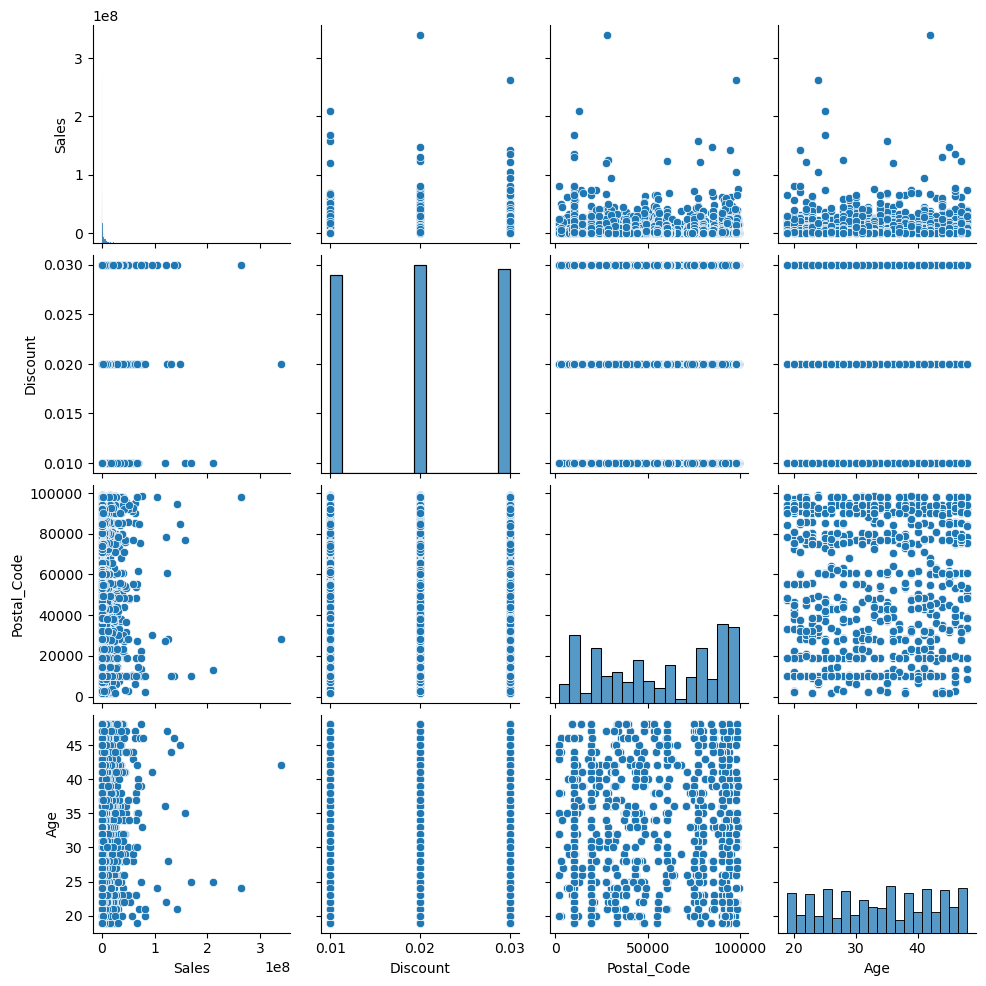

In [38]:
# visuilization the correlations between numerical data.
sns.pairplot(data=store_data, aspect=True, kind='scatter')

In [39]:
# find how many categorical class in each categorical column.
store_data.select_dtypes(include='object').nunique()

Order_ID         4912
Ship_Mode           4
Customer_ID       793
Product_ID       1861
Category            3
Sub_Category       17
Product_Name     1817
Customer_Name     793
Segment             3
Country             1
City              252
State              41
Region              4
dtype: int64

In [41]:
# find the unique values in 'Segment' column.
store_data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [43]:
# find the count of each value in 'Segment' column and sort it by DESC way.
store_data['Segment'].value_counts().sort_values(ascending=False)

Consumer       5084
Corporate      2941
Home Office    1745
Name: Segment, dtype: int64

<Axes: title={'center': 'the count of each value in Segment'}, xlabel='count', ylabel='Segment'>

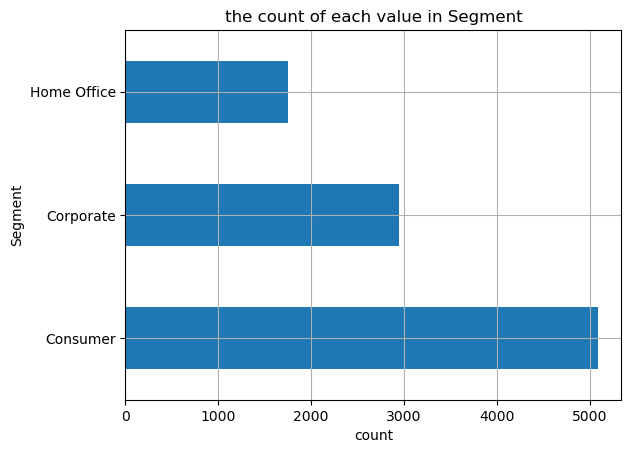

In [59]:
# visuilization of the count of each value in 'Segment' column.
store_data['Segment'].value_counts().sort_values(ascending=False).plot(kind='barh', grid=True, title='the count of each value in Segment', xlabel='count', ylabel='Segment')

In [45]:
# find the unique values in 'Region' column.
store_data['Region'].unique()

array(['South', 'Central', 'East', 'West'], dtype=object)

In [46]:
# find the count of each value in 'Region' column and sort it by DESC way.
store_data['Region'].value_counts().sort_values(ascending=False)

West       3147
East       2703
Central    2327
South      1593
Name: Region, dtype: int64

<Axes: title={'center': 'the count of each value in Region'}, xlabel='count', ylabel='Region'>

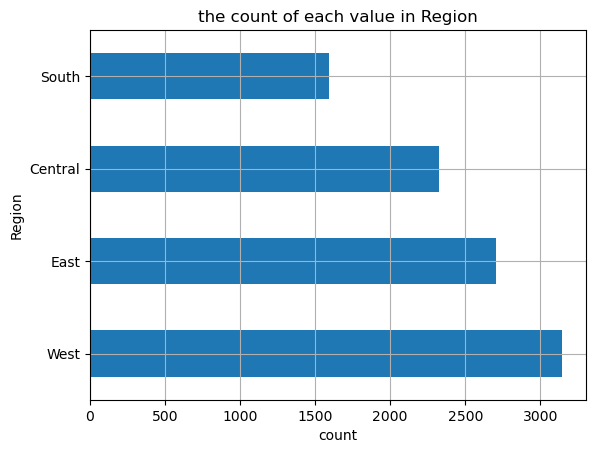

In [58]:
# visuilization of the count of each value in 'Region' column.
store_data['Region'].value_counts().sort_values(ascending=False).plot(kind='barh', grid=True, title='the count of each value in Region', xlabel='count', ylabel='Region')

In [48]:
# find the unique values in 'City' column.
store_data['City'].unique()

array(['Henderson', 'Indianapolis', 'Dover', 'Tucson', 'Franklin',
       'Chester', 'Pasadena', 'Lafayette', 'Houston', 'Los Angeles',
       'Manteca', 'Lawrence', 'Chicago', 'Charlotte', 'New York City',
       'Gastonia', 'Hoover', 'Jacksonville', 'Montgomery',
       'Fort Lauderdale', 'Orem', 'Dallas', 'Perth Amboy', 'Roseville',
       'Seattle', 'San Diego', 'Greenville', 'Philadelphia', 'Louisville',
       'San Francisco', 'Florence', 'Richmond', 'Marysville',
       'Naperville', 'Monroe', 'Pico Rivera', 'Wilmington', 'Des Moines',
       'Arlington', 'Lorain', 'Tamarac', 'Minneapolis', 'Decatur',
       'Bowling Green', 'Hackensack', 'Redlands', 'Hialeah', 'Akron',
       'Phoenix', 'Oakland', 'Bridgeton', 'Waynesboro', 'Rochester',
       'Concord', 'Santa Clara', 'Carrollton', 'Highland Park',
       'Fort Worth', 'Trenton', 'Columbus', 'Providence', 'New Rochelle',
       'Plano', 'Asheville', 'Manchester', 'Madison', 'Burlington',
       'West Jordan', 'Kenosha', 'Palm 

In [49]:
# find the count of the top 10 value in 'City' column and sort it by DESC way.
store_data['City'].value_counts().sort_values(ascending=False).head(10)

New York City    831
Los Angeles      700
Philadelphia     575
San Francisco    454
Seattle          379
Houston          375
Chicago          302
Columbus         230
Aurora           164
Dallas           160
Name: City, dtype: int64

<Axes: title={'center': 'the count of the top 10 value in City'}, xlabel='count', ylabel='City'>

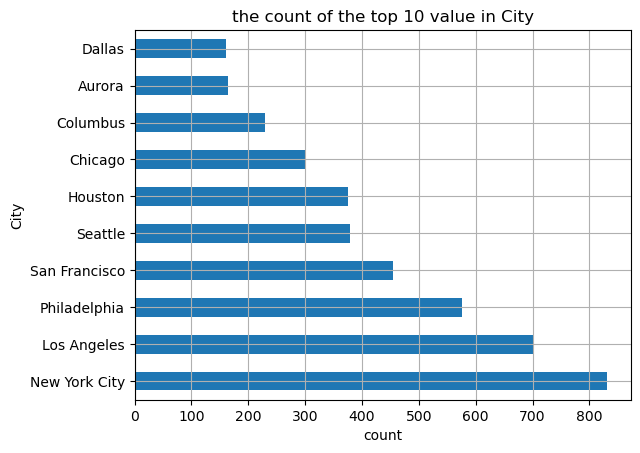

In [60]:
# visuilization the count of the top 10 value in 'City' column.
store_data['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', grid=True, title='the count of the top 10 value in City', xlabel='count', ylabel='City')

In [51]:
# find the count of the last 10 value in 'City' column and sort it by DESC way.
store_data['City'].value_counts().sort_values(ascending=False).tail(10)

Saint Peters         4
Lehi                 4
Tallahassee          3
Round Rock           3
Middletown           3
Richardson           3
Escondido            3
Lakeland             2
Tulsa                2
Arlington Heights    1
Name: City, dtype: int64

<Axes: title={'center': 'the count of the last 10 value in City'}, xlabel='count', ylabel='City'>

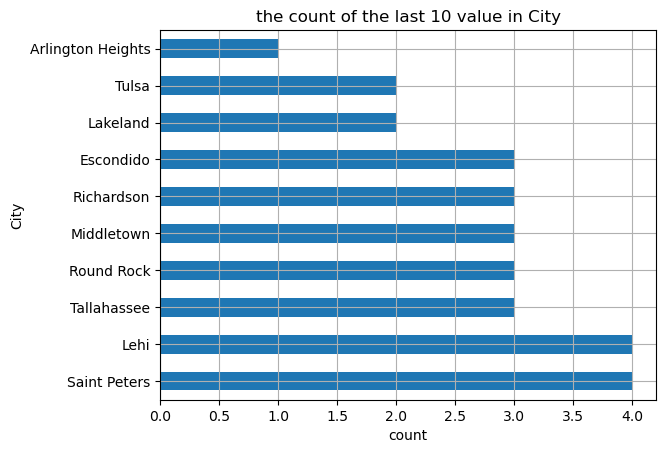

In [61]:
# visuilization the count of the last 10 value in 'City' column.
store_data['City'].value_counts().sort_values(ascending=False).tail(10).plot(kind='barh', grid=True, title='the count of the last 10 value in City', xlabel='count', ylabel='City')

In [53]:
# find the unique values in 'State' column.
store_data['State'].unique()

array(['Kentucky', 'Indiana', 'Delaware', 'Arizona', 'Wisconsin',
       'Pennsylvania', 'Texas', 'Louisiana', 'California',
       'Massachusetts', 'Illinois', 'North Carolina', 'New York',
       'Alabama', 'Florida', 'Utah', 'New Jersey', 'Tennessee',
       'Washington', 'Iowa', 'Virginia', 'Ohio', 'Minnesota', 'Michigan',
       'Georgia', 'Rhode Island', 'Connecticut', 'Nebraska', 'Colorado',
       'Arkansas', 'Kansas', 'Oregon', 'Missouri', 'Mississippi',
       'Oklahoma', 'Maryland', 'New Mexico', 'District of Columbia',
       'South Dakota', 'New Hampshire', 'Nevada'], dtype=object)

In [55]:
# find count of the top 10 values in 'State' column. 
store_data['State'].value_counts().sort_values(ascending=False).head(10)

California        1931
New York          1083
Texas              903
Pennsylvania       631
Illinois           563
Ohio               465
Washington         453
North Carolina     333
Arizona            295
Florida            285
Name: State, dtype: int64

<Axes: title={'center': 'the count of the top 10 State'}, xlabel='count', ylabel='State'>

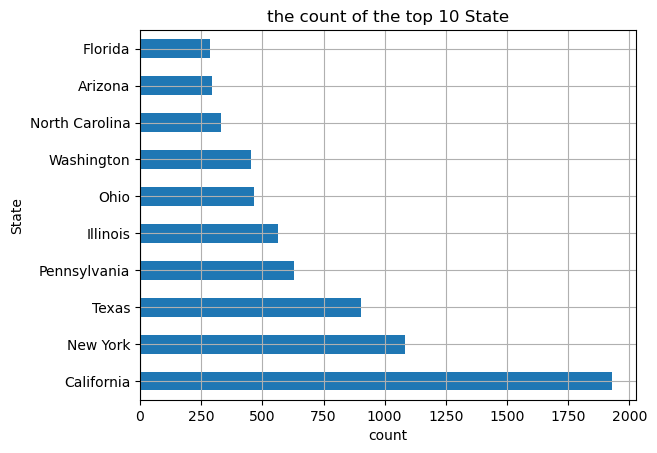

In [64]:
# visuilization of the top 10 values in 'State' column.
store_data['State'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', grid=True, title='the count of the top 10 State', xlabel='count', ylabel='State')

In [133]:
store_data['Age'].value_counts().sort_values(ascending=False).head(10)

42    414
46    406
33    403
20    400
25    396
35    390
34    389
23    373
48    365
45    358
Name: Age, dtype: int64

<Axes: title={'center': 'the top 10 Age'}, xlabel='count', ylabel='Age'>

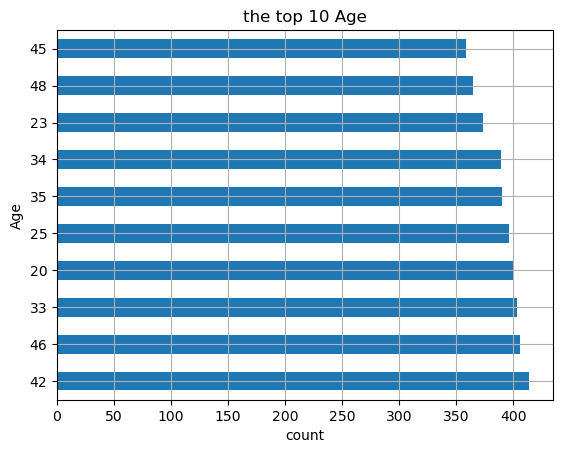

In [135]:
store_data['Age'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', grid=True, title='the top 10 Age', xlabel='count', ylabel='Age')

In [136]:
store_data['Age'].value_counts().sort_values(ascending=False).tail(10)

41    292
30    288
21    284
31    266
24    261
32    256
22    246
19    241
27    239
37    200
Name: Age, dtype: int64

<Axes: title={'center': 'the last 10 Age'}, xlabel='count', ylabel='Age'>

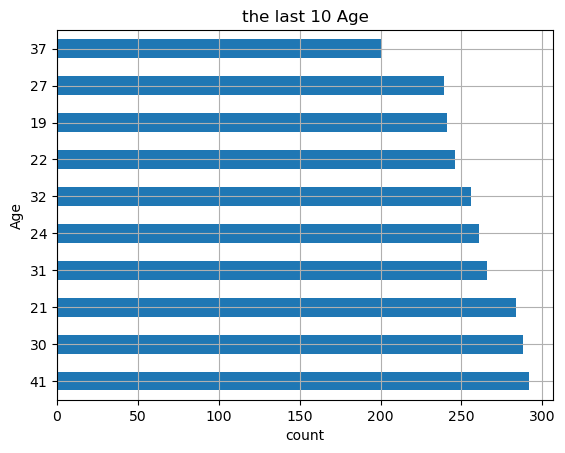

In [137]:
store_data['Age'].value_counts().sort_values(ascending=False).tail(10).plot(kind='barh', grid=True, title='the last 10 Age', xlabel='count', ylabel='Age')